In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('main.csv', sep="\t")
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Store_Type,Store_Size
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,B,118221
420208,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,B,118221
420209,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,B,118221
420210,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,B,118221


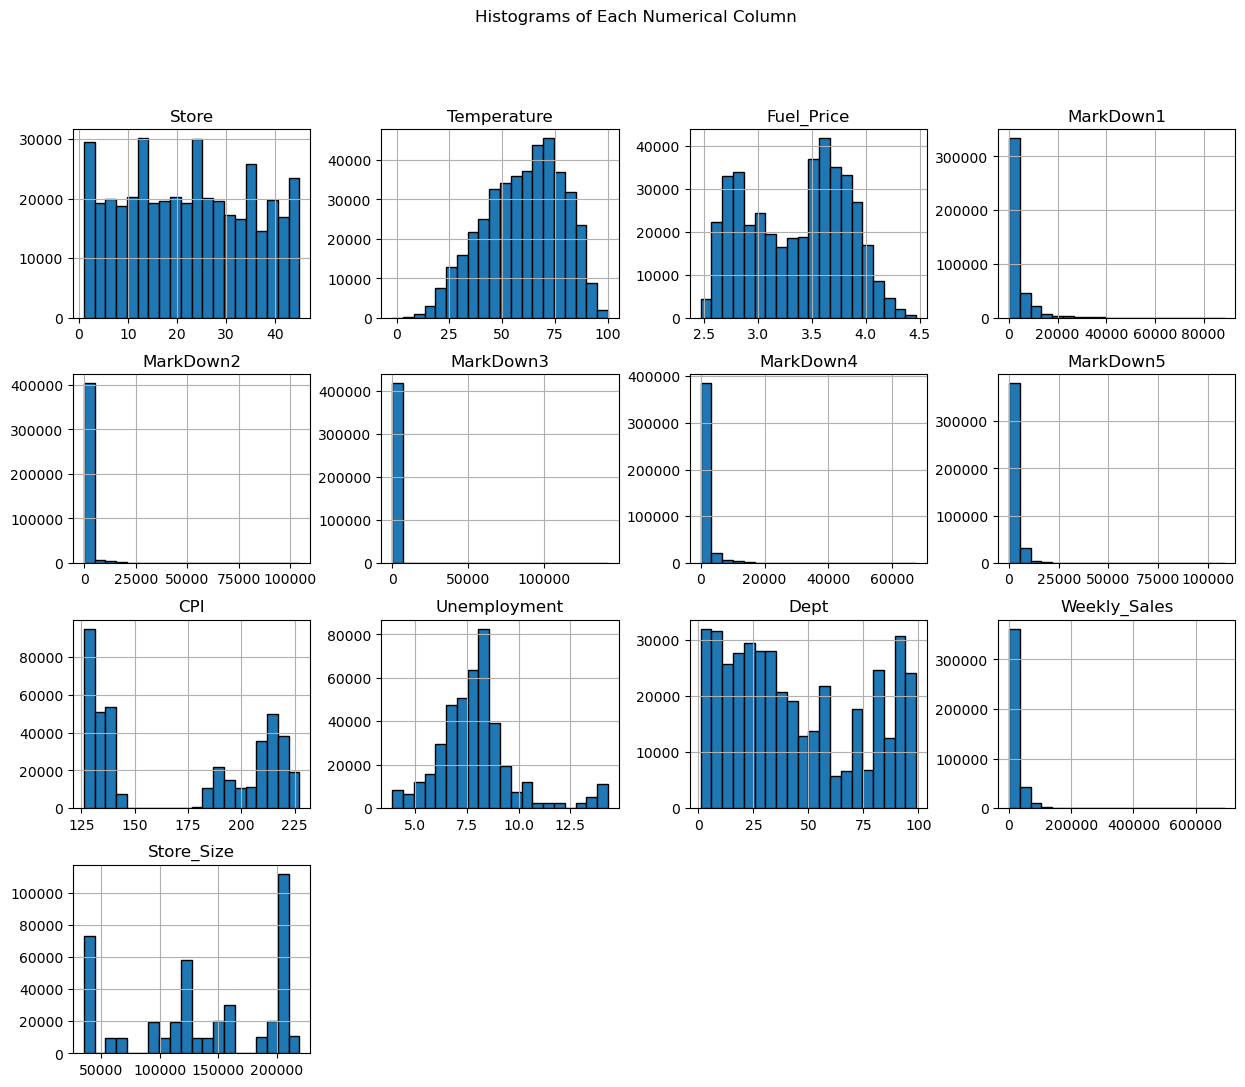

In [4]:
df.hist(bins=20, figsize=(15,12), edgecolor='black')
plt.suptitle('Histograms of Each Numerical Column')
plt.show()


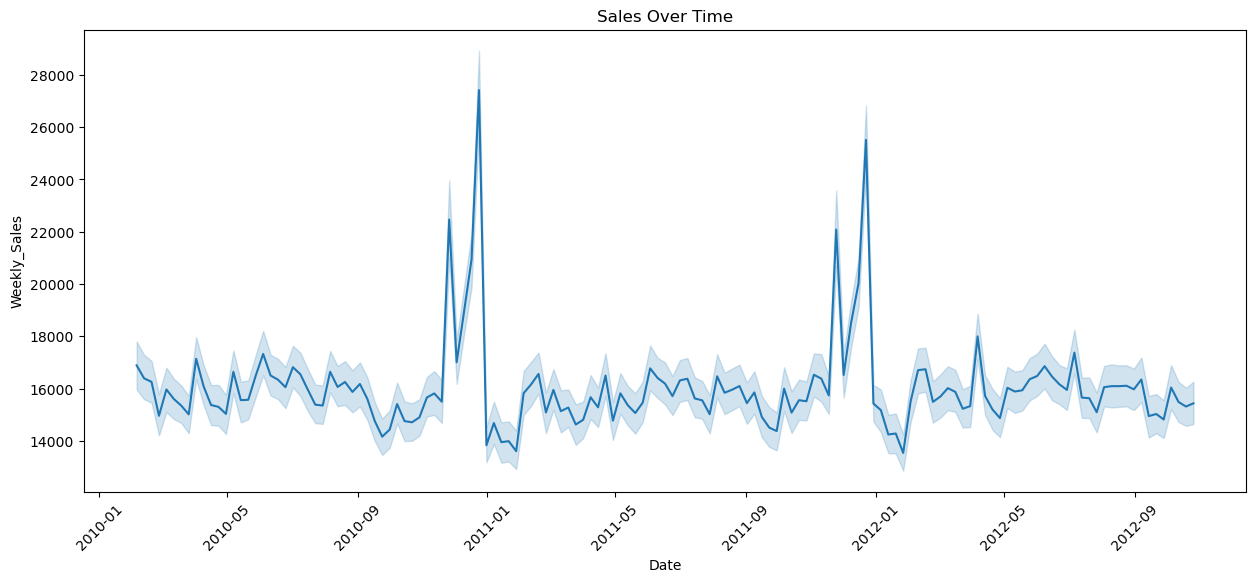

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

#Week_Sales
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.title('Sales Over Time')
plt.xticks(rotation=45)
plt.show()


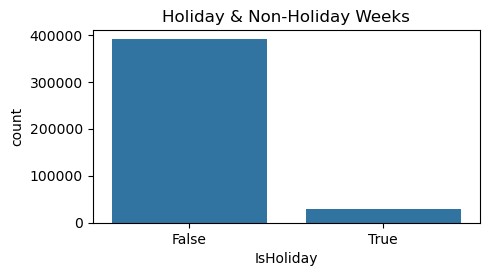

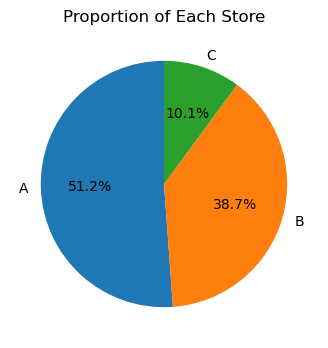

In [6]:
#Holiday & Non-Holiday Week
plt.figure(figsize=(5, 2.5))
sns.countplot(x='IsHoliday', data=df)
plt.title('Holiday & Non-Holiday Weeks')
plt.show()

#Percentage of Each Store 
df['Store_Type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4), startangle=90)
plt.title('Proportion of Each Store')
plt.ylabel('')
plt.show()


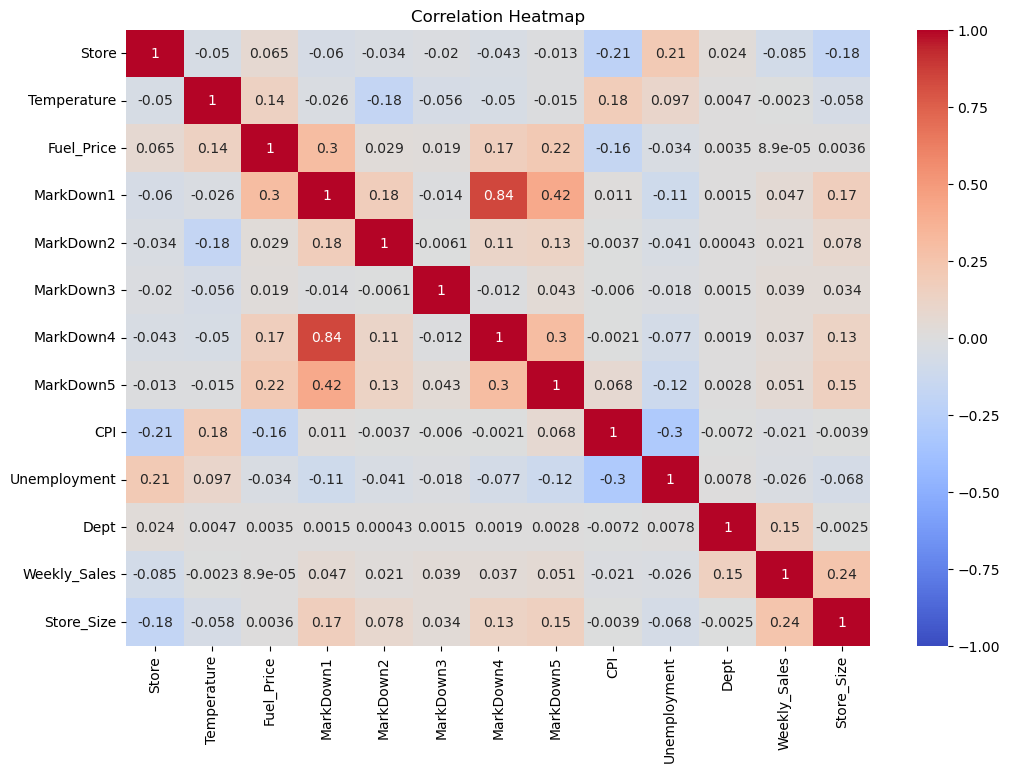

In [7]:
numerical_data = df.select_dtypes(include=['number'])
#Heatmap of Numerical Columns
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

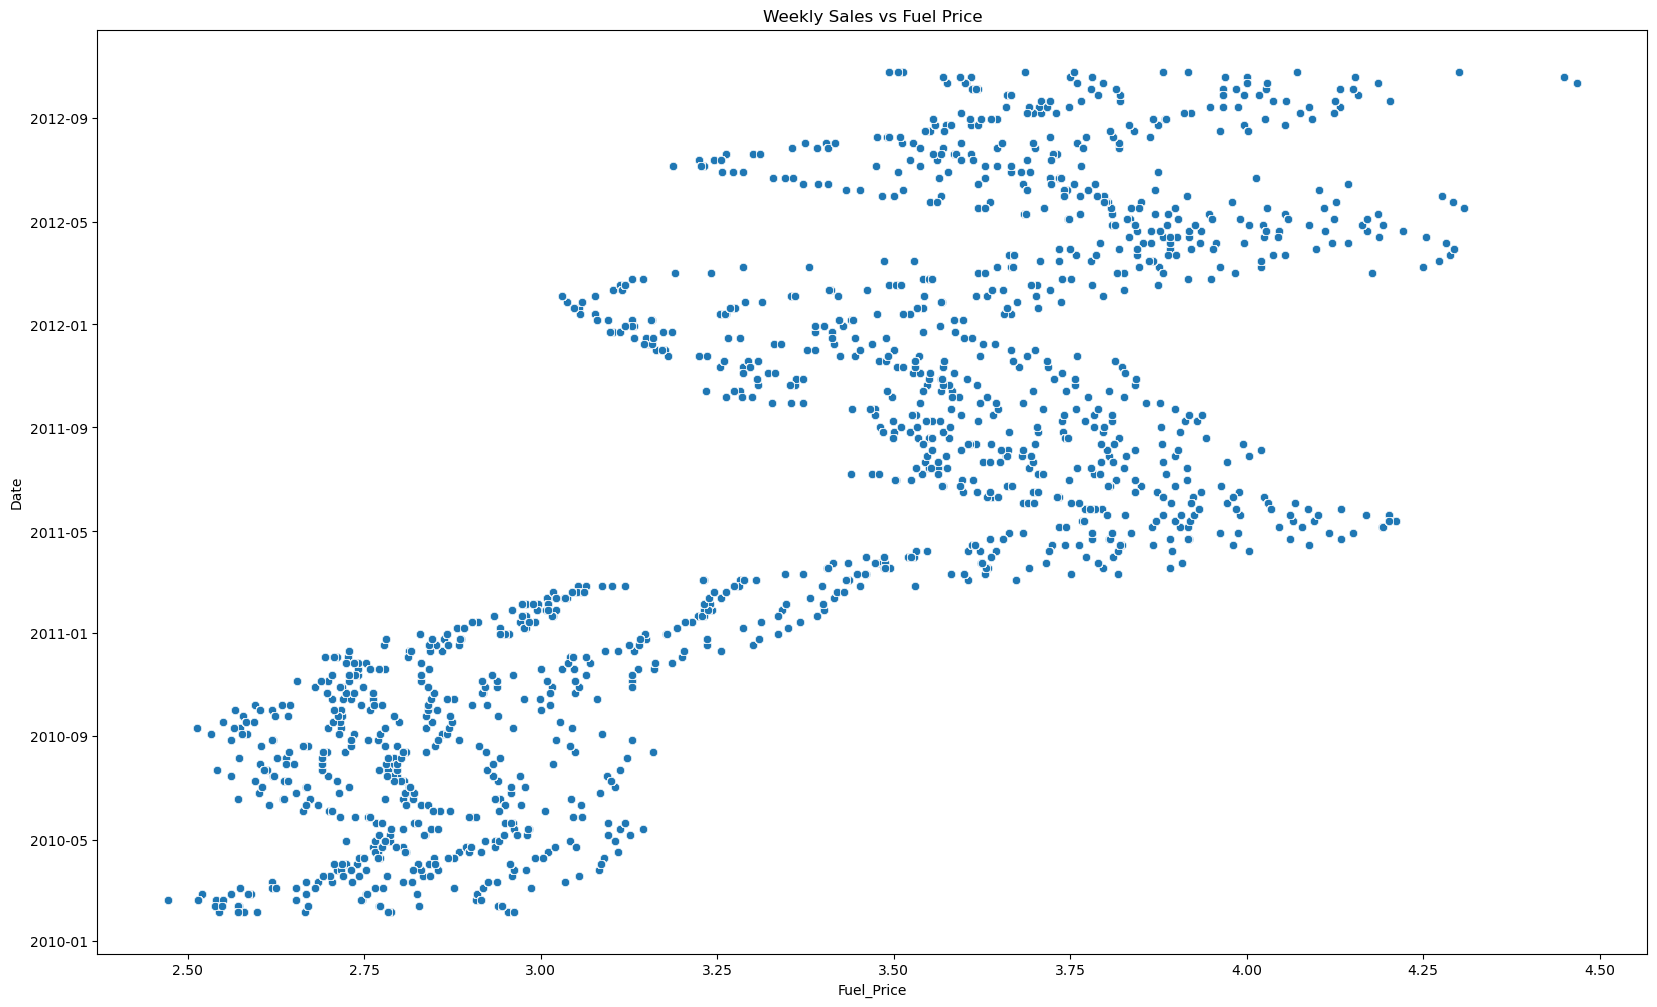

In [8]:
# Fuel Price vs Weekly Sales
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Fuel_Price', y='Date', data=df)
plt.title('Weekly Sales vs Fuel Price')
plt.show()


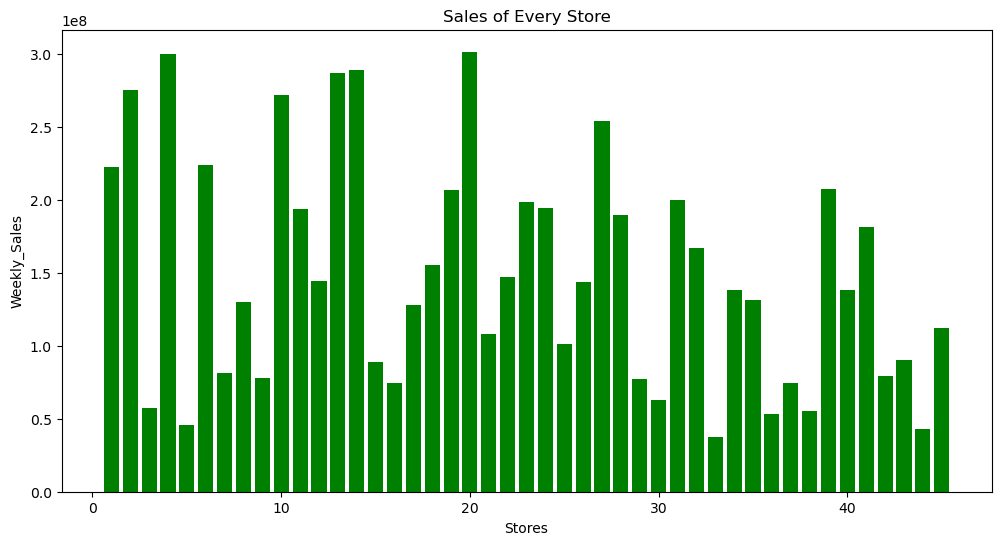

In [9]:
#Grouping the targeted columns
Store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Plot total sales by store
plt.figure(figsize=(12, 6))
plt.bar(Store['Store'], Store['Weekly_Sales'], color='green')
plt.title('Sales of Every Store')
plt.xlabel('Stores')
plt.ylabel('Weekly_Sales')
plt.show()


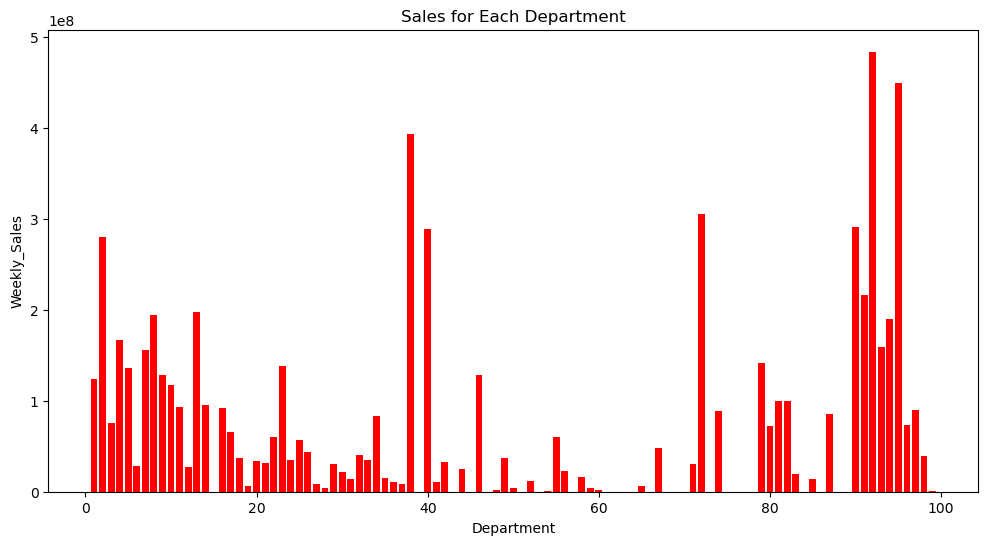

In [10]:
#Grouping the targeted columns
Department = df.groupby('Dept')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(Department['Dept'], Department['Weekly_Sales'], color='red')
plt.title('Sales for Each Department')
plt.xlabel('Department')
plt.ylabel('Weekly_Sales')
plt.show()


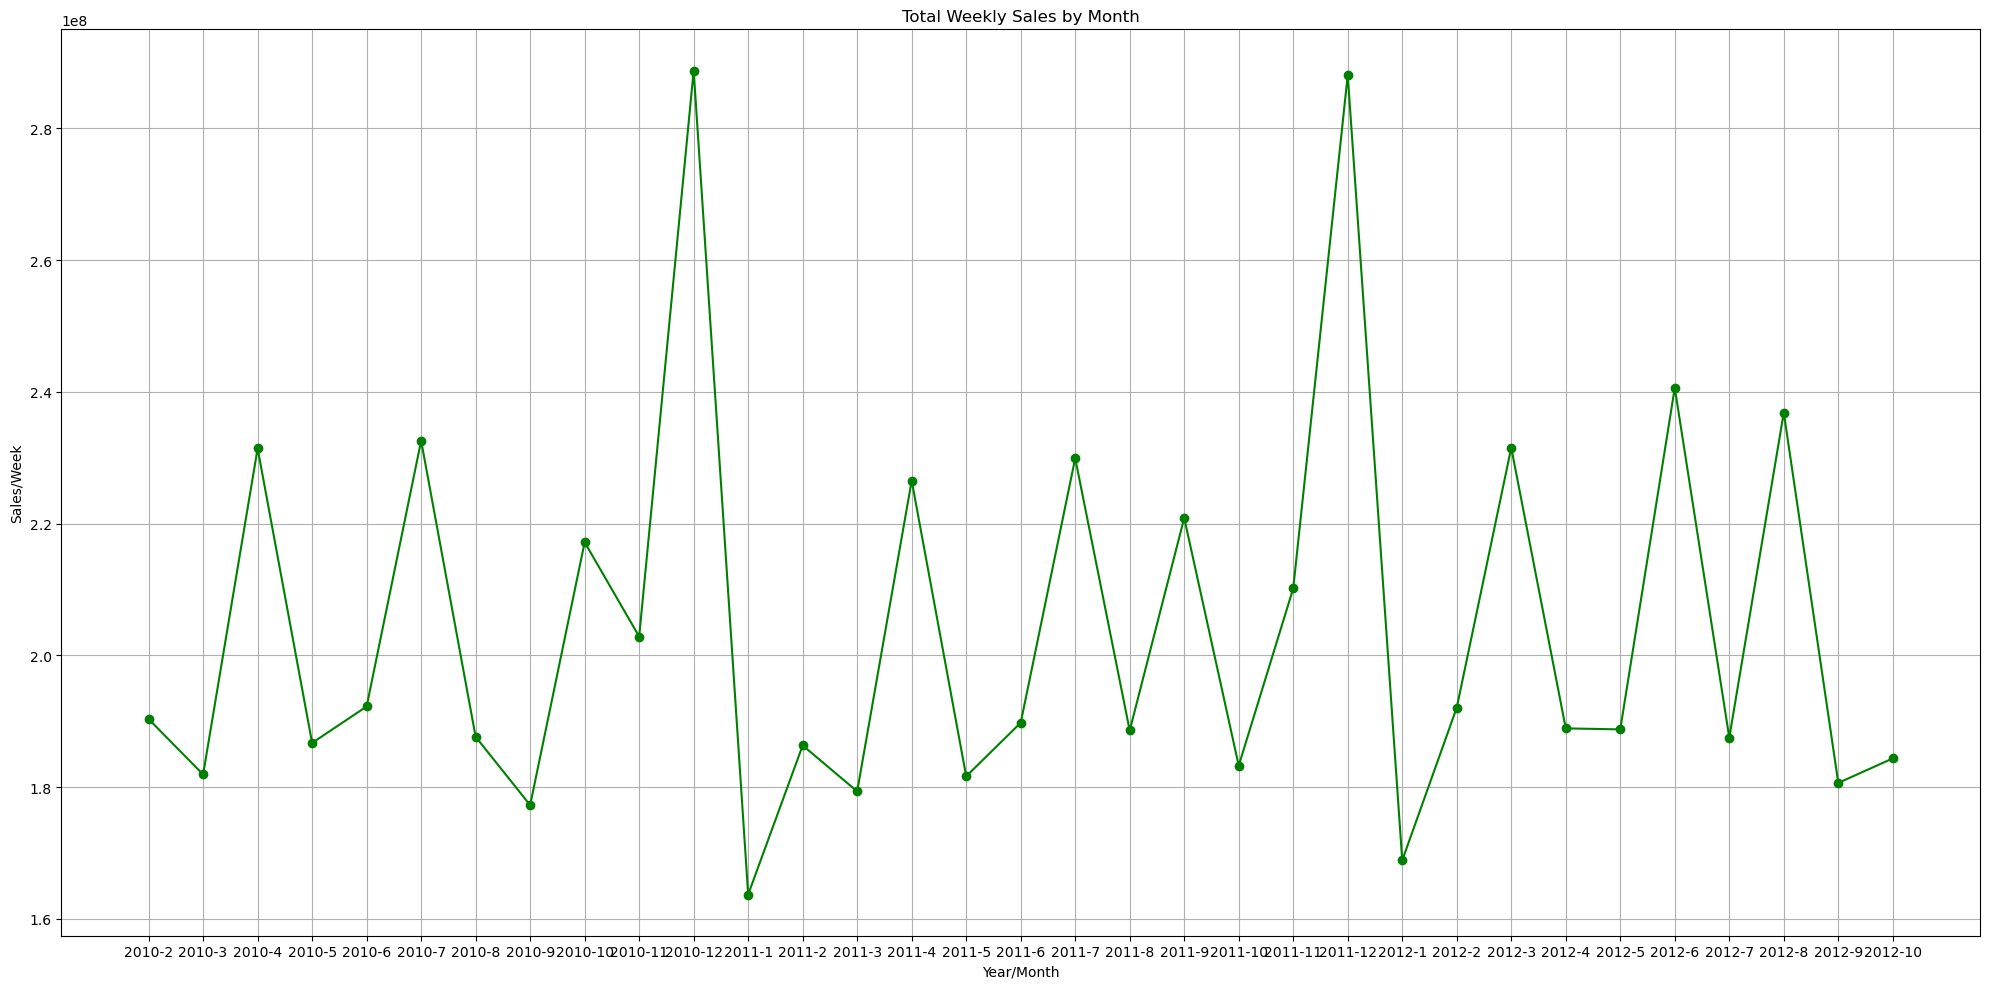

In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#Separating the date column into year, month & day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

#Grouping Year & Month by weekly sales
Sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

#Weekly Sales every month
plt.figure(figsize=(20, 10))
plt.plot(Sales['Year'].astype(str) + '-' + Sales['Month'].astype(str), 
         Sales['Weekly_Sales'], marker='o', color='g')
plt.title('Total Weekly Sales by Month')
plt.xlabel('Year/Month')
plt.ylabel('Sales/Week')
plt.grid(True)
plt.tight_layout()
plt.show()